In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv("train.csv",sep = ",",engine = "python")
data

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
0          1  2011-08-20       43     27.0    4.0        NaN       NaN   
1          2  2011-08-23       34     19.0    3.0        NaN       NaN   
2          3  2011-08-27       43     29.0    2.0        NaN       NaN   
3          4  2011-09-01       89     50.0    9.0        NaN       NaN   
4          5  2011-09-05       77     77.0    4.0        NaN       NaN   
5          6  2011-09-06       67     46.0   14.0        NaN       NaN   
6          7  2011-09-08       25     14.0   10.0        NaN       NaN   
7          8  2011-09-09       44     44.0    5.0        NaN       NaN   
8          9  2011-09-10       42     27.0    5.0        NaN       NaN   
9         10  2011-09-13       36     21.0    9.0        NaN       NaN   
10        11  2011-09-16       36     19.0   12.0        NaN       NaN   
11        12  2011-09-16       38     19.0   11.0        NaN       NaN   
12        13  2011-09-17       43     28.0    4.0        NaN       NaN   
13        14  2011-09-19       31     31.0    4.0        NaN       NaN   
14        15  2011-09-19       31     21.0    3.0        NaN       NaN   
15        16  2011-09-20       51     31.0   15.0        NaN       NaN   
16        17  2011-09-20       47     31.0    4.0        NaN       NaN   
17        18  2011-09-20       42     28.0    2.0        NaN       NaN   
18        19  2011-09-22       59     33.0   10.0        NaN       NaN   
19        20  2011-09-22       44     29.0    4.0        NaN       NaN   
20        21  2011-09-22       74     44.0   10.0        NaN       NaN   
21        22  2011-09-22       39     39.0    7.0        NaN       NaN   
22        23  2011-09-23       48     34.0    6.0        NaN       NaN   
23        24  2011-09-23       32     18.0    3.0        NaN       NaN   
24        25  2011-09-23       34     19.0   11.0        NaN       NaN   
25        26  2011-09-24       45     29.0    9.0        NaN       NaN   
26        27  2011-09-26       35     20.0    4.0        NaN       NaN   
27        28  2011-09-26       38     20.0    6.0        NaN       NaN   
28        29  2011-09-26       73     38.0   15.0        NaN       NaN   
29        30  2011-09-27       42     27.0    3.0        NaN       NaN   
...      ...         ...      ...      ...    ...        ...       ...   
30441  30444  2015-06-27      113      1.0   26.0       26.0       1.0   
30442  30445  2015-06-27       40     40.0    2.0       12.0       4.0   
30443  30446  2015-06-27       79      NaN   17.0       17.0       1.0   
30444  30447  2015-06-27       85      NaN   20.0       25.0       4.0   
30445  30448  2015-06-27       47     47.0   19.0       25.0       1.0   
30446  30449  2015-06-27       82     82.0    8.0        8.0       6.0   
30447  30450  2015-06-27       64      NaN   15.0       17.0       1.0   
30448  30451  2015-06-27       74      NaN    8.0       17.0       1.0   
30449  30452  2015-06-27       47     47.0    7.0       25.0       1.0   
30450  30453  2015-06-29       65      NaN    5.0        0.0       1.0   
30451  30454  2015-06-29       37      NaN    3.0        3.0       1.0   
30452  30455  2015-06-29       38     19.0    7.0       17.0       1.0   
30453  30456  2015-06-29       45      1.0    6.0       15.0       6.0   
30454  30457  2015-06-29       40     26.0    3.0        9.0       2.0   
30455  30458  2015-06-29       79     79.0    3.0        3.0       1.0   
30456  30459  2015-06-29       52     30.0    8.0       14.0       1.0   
30457  30460  2015-06-29       58     43.0    7.0        9.0       1.0   
30458  30461  2015-06-29       50      1.0    7.0        7.0       1.0   
30459  30462  2015-06-29       51      NaN    4.0       17.0       4.0   
30460  30463  2015-06-29       54     32.0    8.0       16.0       1.0   
30461  30464  2015-06-30       36     19.0    5.0       16.0       1.0   
30462  30465  2015-06-30       47     30.0   23.0       25.0       4.0   
30463  30466  

Text(0,0.5,'Количество')

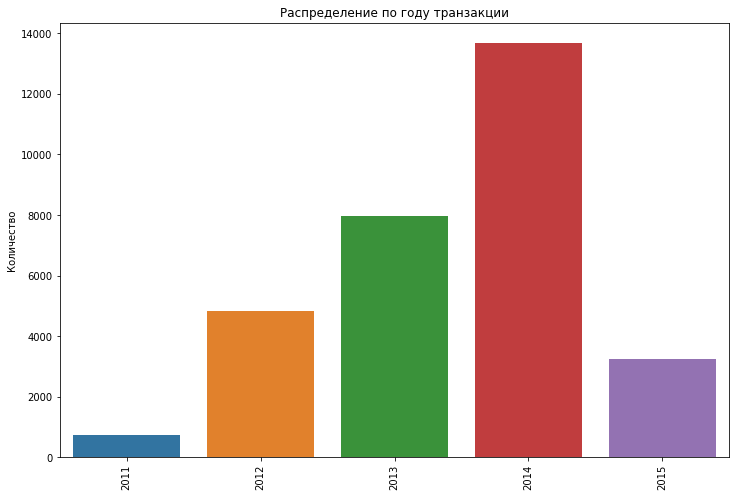

In [3]:
time_t = []
for i in data.timestamp:
    time_t.append(int(i[0:4]))

f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.countplot(x=time_t)
ax.set(title='Распределение по году транзакции')
ax.set_ylabel("Количество")

In [4]:
data["investment"] = 0
for i in data.index:
    if (~np.isnan(data.loc[[i]].build_year.get_values()[0])):
        if (int(data.loc[[i]].timestamp.get_values()[0][0:4]) > data.loc[[i]].build_year.get_values()[0]):
            data.ix[i,"investment"] = 0
        else:
            data.ix[i,"investment"] = 1
    else:
        data.ix[i,"investment"] = 2




C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


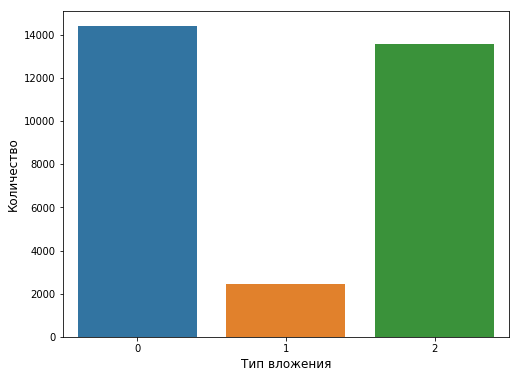

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(data.investment)
plt.xlabel('Тип вложения', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

In [6]:
a = 0
b = 0
c = 0
a1 = 0
a2 = 0
a3 = 0
for i in data.index:
    if(data.ix[i,"investment"] == 0):
        a = a + data.ix[i,"price_doc"]
        a1 = a1 + 1
    if(data.ix[i,"investment"] == 1):
        b = b + data.ix[i,"price_doc"]
        a2 = a2 + 1
    if(data.ix[i,"investment"]  == 2):
        c = c + data.ix[i,"price_doc"]
        a3 = a3 + 1

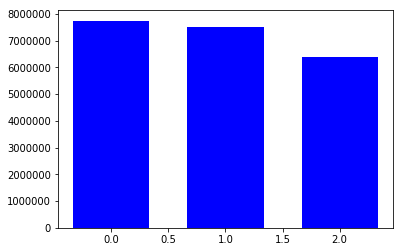

In [7]:
y = []
y.append(a/a1)
y.append(b/a2)
y.append(c/a3)
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")
plt.show()

Решил в начале посмотреть на цену, на наличие выбросов. Мне показалось что выбросов нет и решил ничего не убирать тут.

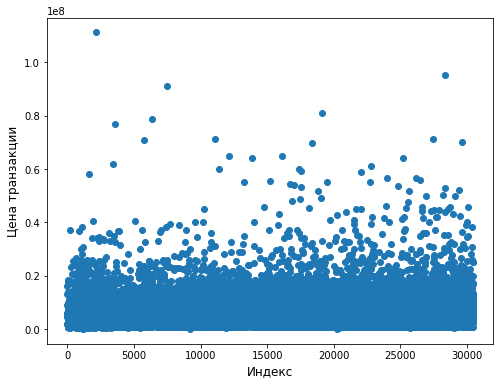

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), (data.price_doc.values))
plt.xlabel('Индекс', fontsize=12)
plt.ylabel('Цена транзакции', fontsize=12)
plt.show()

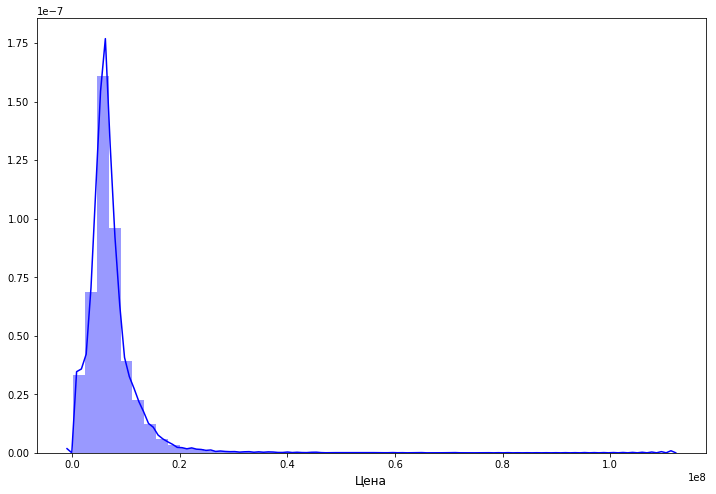

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
sns.distplot(data.price_doc.values, ax=ax, color='blue')
plt.xlabel('Цена', fontsize=12)
plt.show()

Посмотрел на общее количество выбросов в данных. Для некоторых признаков не хватает более 40% информации.

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


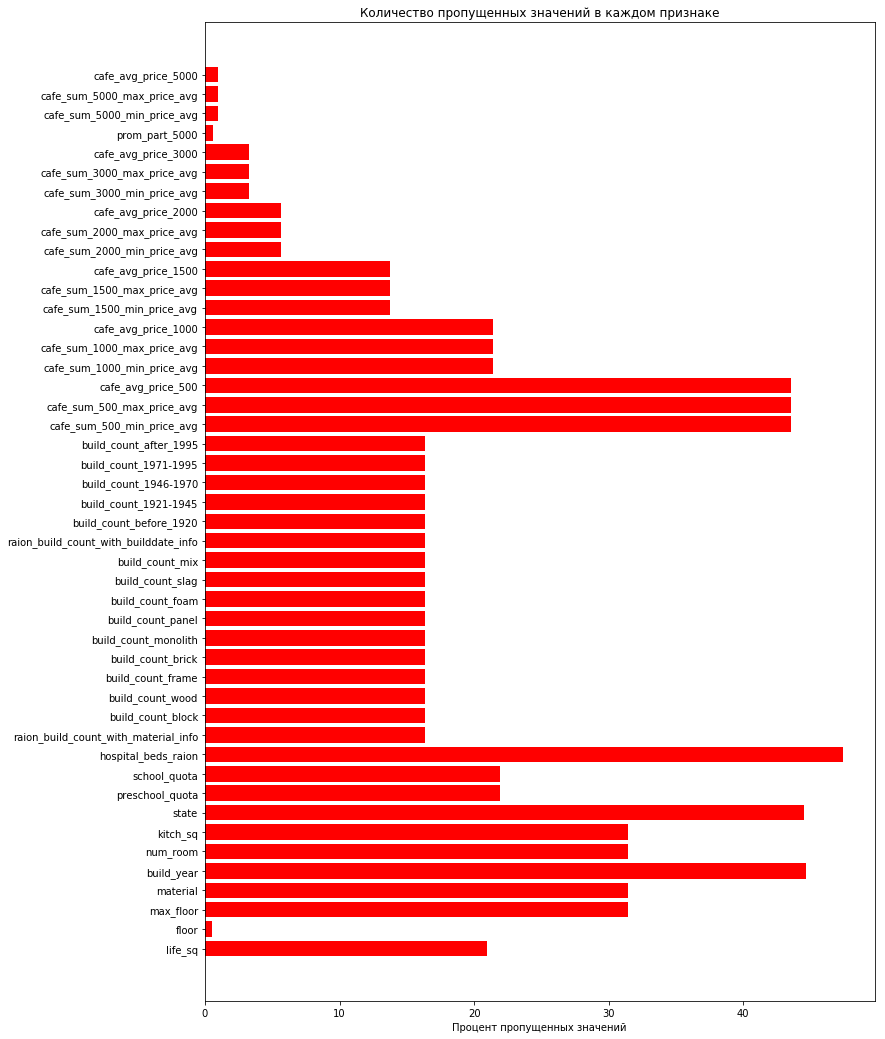

In [10]:
missing_data = data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.ix[missing_data['missing_count']>100]
missing_data.missing_count = missing_data.missing_count/len(data)*100
ind = np.arange(missing_data.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_data.missing_count.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation='horizontal')
ax.set_xlabel("Процент пропущенных значений")
ax.set_title("Количество пропущенных значений в каждом признаке")
plt.show()

Исправил пару выбросов, в состоянии должны быть значения от 1 до 4, затясалось 33. А в дате должны быть только года.

In [11]:
data.state[data.state == 33]= 4 
data.build_year[data.build_year == 20052009] = 2005


In [12]:
df_drop_missing = data.dropna()
df_drop_missing

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
8056    8059  2013-05-21       11     11.0    2.0        5.0       2.0   
8154    8157  2013-05-27       45     27.0    6.0        9.0       1.0   
8287    8290  2013-06-03       77     50.0    3.0        5.0       2.0   
8387    8390  2013-06-07       56     29.0    5.0       16.0       5.0   
8391    8394  2013-06-07       31     21.0    5.0        9.0       5.0   
8410    8413  2013-06-10       43     27.0    1.0        5.0       2.0   
8423    8426  2013-06-10       46     29.0    9.0        9.0       2.0   
8427    8430  2013-06-10       45     29.0    2.0        9.0       1.0   
8452    8455  2013-06-11       38     24.0    4.0        9.0       2.0   
8470    8473  2013-06-11       54     32.0    7.0       17.0       1.0   
8499    8502  2013-06-14       37     18.0    2.0        0.0       1.0   
8501    8504  2013-06-14       40     24.0    7.0        8.0       2.0   
8519    8522  2013-06-15       56     38.0    2.0        9.0       1.0   
8535    8538  2013-06-17       38     23.0    7.0       12.0       5.0   
8563    8566  2013-06-19       46     45.0    5.0        5.0       1.0   
8577    8580  2013-06-19       44     27.0    2.0        9.0       1.0   
8590    8593  2013-06-20       39     20.0    3.0       12.0       1.0   
8625    8628  2013-06-22       54     32.0   10.0       12.0       1.0   
8639    8642  2013-06-24       44     28.0    8.0        9.0       2.0   
8652    8655  2013-06-24       45     28.0    2.0        5.0       1.0   
8689    8692  2013-06-25       61     32.0   12.0       14.0       1.0   
8696    8699  2013-06-26       44     30.0    4.0        5.0       5.0   
8699    8702  2013-06-26       51     32.0    6.0       14.0       2.0   
8700    8703  2013-06-26       51     24.0    7.0       14.0       2.0   
8702    8705  2013-06-26       45     30.0    2.0       12.0       1.0   
8721    8724  2013-06-26       57     35.0    4.0        5.0       2.0   
8723    8726  2013-06-26       65     33.0   10.0       20.0       2.0   
8727    8730  2013-06-26       30     17.0    5.0        9.0       2.0   
8729    8732  2013-06-26       36     18.0   12.0       16.0       5.0   
8740    8743  2013-06-27       32     19.0    4.0        5.0       5.0   
...      ...         ...      ...      ...    ...        ...       ...   
30356  30359  2015-06-22       96     69.0    2.0        5.0       2.0   
30361  30364  2015-06-22       74     51.0    2.0        5.0       2.0   
30362  30365  2015-06-22       66     45.0    8.0        8.0       1.0   
30365  30368  2015-06-23       55     30.0    3.0       14.0       1.0   
30377  30380  2015-06-23       52     52.0   10.0       17.0       1.0   
30378  30381  2015-06-23       53     30.0    4.0       14.0       1.0   
30390  30393  2015-06-24       60     44.0    2.0        9.0       1.0   
30397  30400  2015-06-24      109     60.0   11.0       17.0       4.0   
30399  30402  2015-06-24       45     30.0    5.0        5.0       1.0   
30403  30406  2015-06-24       61     34.0    9.0       17.0       1.0   
30406  30409  2015-06-24       85     62.0    2.0        5.0       2.0   
30409  30412  2015-06-24       42     17.0    2.0       16.0       4.0   
30410  30413  2015-06-25       42     28.0    2.0        5.0       2.0   
30412  30415  2015-06-25       42     28.0    5.0        5.0       2.0   
30416  30419  2015-06-25       54     28.0    1.0       16.0       5.0   
30434  30437  2015-06-26       76     44.0    6.0       12.0       1.0   
30436  30439  2015-06-26       39     20.0    7.0       12.0       1.0   
30438  30441  2015-06-26       88     58.0    7.0        8.0       2.0   
30440  30443  2015-06-27       99     47.0    4.0        6.0       2.0   
30441  30444  2015-06-27      113      1.0   26.0       26.0       1.0   
30445  30448  2015-06-27       47     47.0   19.0       25.0       1.0   
30449  30452  2015-06-27       47     47.0    7.0       25.0       1.0   
30452  30455  

Разбор признаков. Характеристики квартиры.
__________________________________________________________________________________________________________________________

In [13]:
internal_chars = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 
                    'kitch_sq', 'state', 'price_doc']


Text(0.5,1,'Матрица корреляции характеристик квартиры')

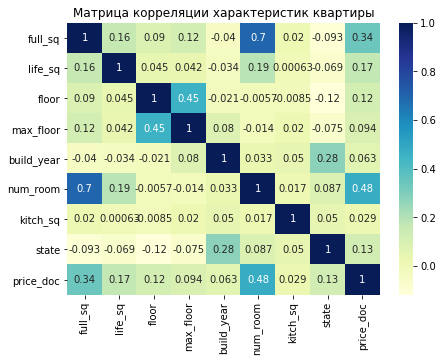

In [14]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data[internal_chars].corr(),cmap="YlGnBu",annot=True)
plt.title('Матрица корреляции характеристик квартиры', fontsize=12)


Из основных параметров квартиры, с ценой сильно коррелируют полная площадь квартиры и количество комнат.

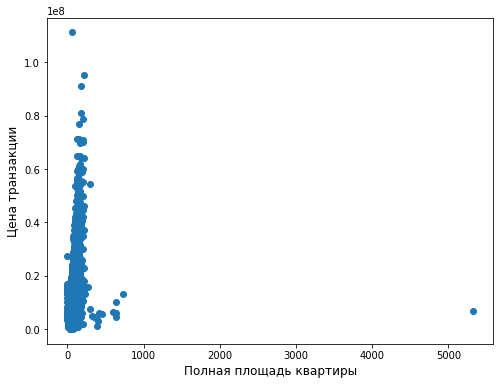

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(data.full_sq, data.price_doc.values)
plt.xlabel('Полная площадь квартиры', fontsize=12)
plt.ylabel('Цена транзакции', fontsize=12)
plt.show()

Видно выброс справа. Судя по площади больше 5000, что то решил продать Медведев из своей недвижимости)

In [16]:
data = data.ix[~(data['full_sq']>5000)]

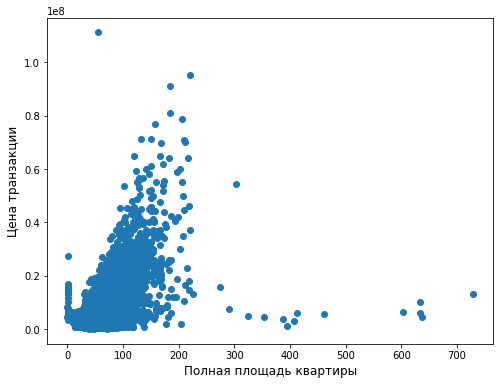

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(data.full_sq, data.price_doc.values)
plt.xlabel('Полная площадь квартиры', fontsize=12)
plt.ylabel('Цена транзакции', fontsize=12)
plt.show()

Тут мне показалось странным квартиры, которые стоят меньше 20 миллионов, а площадью больше 300 метров квадратных. Но не стал убирать. 

In [18]:
a =data[data.full_sq < 15]["id"]
for i in a:
    data.set_value(i-3,'full_sq', 20)
    data.set_value(i-3,'life_sq', 20)
    data.set_value(i-3,'kitch_sq', 7)

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


Дальше решил посмотреть, есть ли квартиры в которых общая площадь меньше жилой площади. По идее такого быть не может, но нашлось 37 объектов таких. Удалил их.

In [19]:
data = data.ix[~(data.life_sq > data.full_sq)]

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


ПОсмотрел на количество комнат в квартирах. Есть квартиры с количеством комнат = 0.

In [20]:
data.num_room.value_counts()

2.0     8124
1.0     7599
3.0     4666
4.0      418
5.0       40
0.0       14
6.0        9
8.0        3
10.0       2
7.0        1
19.0       1
9.0        1
17.0       1
Name: num_room, dtype: int64

Удалил квартиры с 0 количеством комнат 

In [21]:
data = data.ix[~(data.num_room==0)]

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Решил проверить площадь кухни. Она тоже должна быть меньше жилой площади и полной площади.

Удалил такие квартиры

In [22]:
data = data.ix[~(data.kitch_sq > data.life_sq)]
data = data.ix[~(data.kitch_sq > data.full_sq)]

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Посмотрел на оставшиеся. Cитуация такая же как и с обычной площадью, есть странные значения площади кухни под 100 метров, а цена меньше 20 миллионов. По идее такие значения должны быть диагонально расположены.

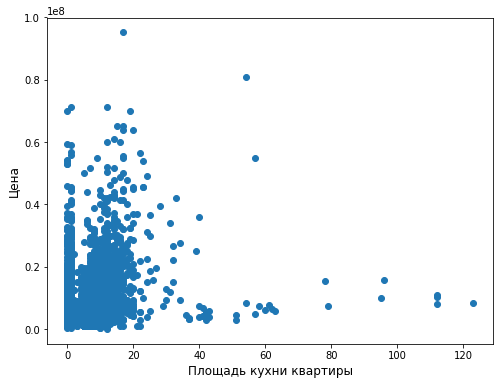

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(data.kitch_sq, data.price_doc.values)
plt.xlabel('Площадь кухни квартиры', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

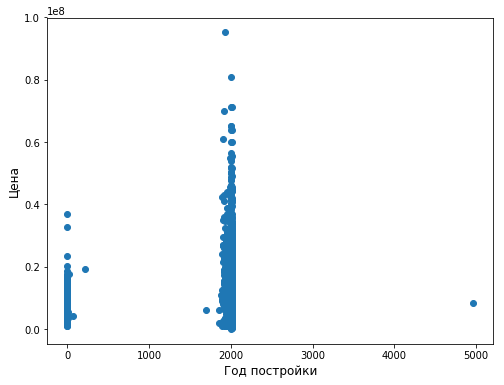

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(data.build_year, data.price_doc.values)
plt.xlabel('Год постройки', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.show()

Посмотрел года строительства. Присутсвуют квартиры с годом строительства в 20 году нашей эры...

In [25]:
data.build_year.value_counts()

2014.0    907
2015.0    822
0.0       520
2013.0    456
1970.0    415
1969.0    407
1968.0    389
1967.0    384
1965.0    378
2016.0    369
1.0       368
1972.0    359
1974.0    357
1971.0    351
1966.0    348
1960.0    344
1962.0    337
1973.0    331
1963.0    324
1964.0    315
1975.0    309
1961.0    296
1976.0    263
1977.0    259
2006.0    239
1979.0    235
1978.0    234
2008.0    234
2012.0    232
1980.0    226
         ... 
1890.0      5
1947.0      4
1910.0      4
1949.0      3
1914.0      3
1924.0      3
1943.0      2
1900.0      2
1896.0      2
1860.0      2
1907.0      2
1941.0      2
3.0         2
1946.0      2
1895.0      1
1691.0      1
1911.0      1
2018.0      1
215.0       1
1886.0      1
1905.0      1
4965.0      1
1906.0      1
1920.0      1
1925.0      1
1948.0      1
1904.0      1
71.0        1
20.0        1
1876.0      1
Name: build_year, Length: 118, dtype: int64

Удалил данные с годом постройки, младше 1691 года.

In [26]:
data = data.ix[~(data.build_year < 1691)]
data = data.ix[~(data.build_year > 2018)]

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Посмотрел какое количество квартир в каком году построено

Text(0,0.5,'Количество')

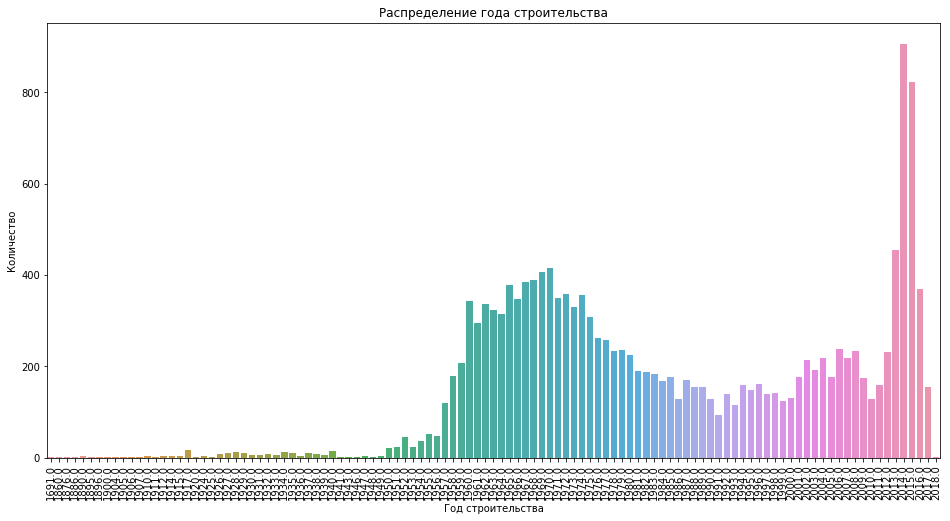

In [27]:
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation='90')
by_df = data.sort_values(by=['build_year'])
sns.countplot(x=by_df['build_year'])
ax.set(title='Распределение года строительства')
plt.xlabel('Год строительства')
plt.ylabel('Количество')

Посмотрел среднюю цену относительно годов и как она изменялась.

[Text(0.5,1,'Daily median price over time')]

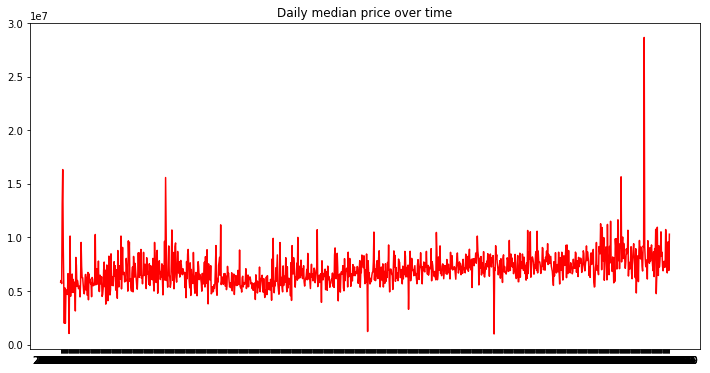

In [28]:
f, ax = plt.subplots(figsize=(12, 6))
ts_df = data.groupby('timestamp')[['price_doc']].mean()
plt.plot(ts_df.index, ts_df['price_doc'], color='r', )
ax.set(title='Daily median price over time')

Показалось странным данные справа, это данные за 2015 год и средняя цена там намного больше чем везде.
Посмотрел внимательнее на эти данные, но ничего странного в них не заметил

In [29]:
a = data[data.price_doc>15000000]
a[a.build_year >=2015]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
12981  12984  2013-12-11       97      1.0   23.0        1.0       4.0   
15067  15070  2014-02-17       99     55.0    6.0       17.0       1.0   
15517  15520  2014-02-27      107    107.0   10.0       10.0       6.0   
15610  15613  2014-03-03       75     75.0    3.0       17.0       1.0   
16481  16484  2014-03-25      104     80.0   21.0       24.0       2.0   
16725  16728  2014-03-29      123      1.0    2.0        1.0       4.0   
19928  19931  2014-06-21      124    124.0   24.0       24.0       1.0   
20084  20087  2014-06-25      112    112.0    7.0        9.0       4.0   
20164  20167  2014-06-26       99     99.0   17.0       17.0       6.0   
20758  20761  2014-07-10      119    114.0    4.0       17.0       6.0   
21200  21203  2014-07-31       72      NaN   15.0       17.0       4.0   
21372  21375  2014-08-08      104    104.0   18.0        0.0       5.0   
22162  22165  2014-09-03      116    116.0    7.0        7.0       1.0   
22937  22940  2014-09-26       94     92.0   15.0       15.0       4.0   
23135  23138  2014-09-30      100     80.0    9.0       25.0       6.0   
23392  23395  2014-10-08       99     54.0   15.0       17.0       4.0   
23399  23402  2014-10-09       74     74.0   24.0       24.0       4.0   
23623  23626  2014-10-16      112    112.0    4.0        9.0       4.0   
23892  23895  2014-10-23      106      1.0    7.0        1.0       1.0   
24145  24148  2014-10-30      119    112.0   12.0       25.0       4.0   
24612  24615  2014-11-12      136      NaN   16.0       22.0       4.0   
24878  24881  2014-11-18      100     95.0   22.0       25.0       1.0   
25149  25152  2014-11-22      153    153.0    2.0       10.0       1.0   
25775  25778  2014-12-03       78     74.0   12.0       12.0       4.0   
26064  26067  2014-12-09       77     50.0    6.0       25.0       6.0   
26094  26097  2014-12-09       78     78.0   15.0       17.0       4.0   
26193  26196  2014-12-10      118    118.0    6.0        1.0       1.0   
26198  26201  2014-12-10      116    116.0   15.0       18.0       1.0   
26213  26216  2014-12-10      127    123.0   10.0       17.0       1.0   
26638  26641  2014-12-17      150    146.0   14.0       17.0       4.0   
...      ...         ...      ...      ...    ...        ...       ...   
28322  28325  2015-03-12       86     47.0    7.0       20.0       4.0   
28407  28410  2015-03-17       92     92.0   19.0       27.0       1.0   
28434  28437  2015-03-18       96     96.0   22.0       25.0       1.0   
28451  28454  2015-03-19      117    117.0    2.0       17.0       1.0   
28547  28550  2015-03-23      121      NaN   20.0       20.0       1.0   
28576  28579  2015-03-24       90     90.0   17.0       21.0       6.0   
28679  28682  2015-03-27      100      NaN   19.0       20.0       1.0   
28853  28856  2015-04-03       88      NaN    7.0        1.0       1.0   
28989  28992  2015-04-08       96     91.0    6.0       17.0       1.0   
29278  29281  2015-04-21      108     90.0   12.0       24.0       6.0   
29289  29292  2015-04-21      108     75.0    9.0       24.0       6.0   
29306  29309  2015-04-22       85      1.0    5.0        1.0       1.0   
29466  29469  2015-04-29      123     77.0   20.0       21.0       1.0   
29611  29614  2015-05-08       71     69.0    4.0       17.0       1.0   
29643  29646  2015-05-12       68      NaN   22.0        1.0       1.0   
29718  29721  2015-05-15       96     96.0   12.0       17.0       1.0   
29767  29770  2015-05-18       81     77.0    7.0       10.0       2.0   
29787  29790  2015-05-19       99      NaN   12.0        1.0       1.0   
29922  29925  2015-05-25       97     93.0   15.0       17.0       1.0   
29980  29983  2015-05-27       98     70.0   18.0       25.0       4.0   
29997  30000  2015-05-28       83     83.0    6.0       10.0       1.0   
30025  30028  2015-05-29      108      NaN    8.0       16.0       1.0   
30029  30032  

посмотрел на распределние цены с состонием квартиры и материала стен. Ничего интересного

[Text(0,0.5,'Цена'),
 Text(0.5,0,'Состояние'),
 Text(0.5,1,'Распределение цены относительно состояния')]

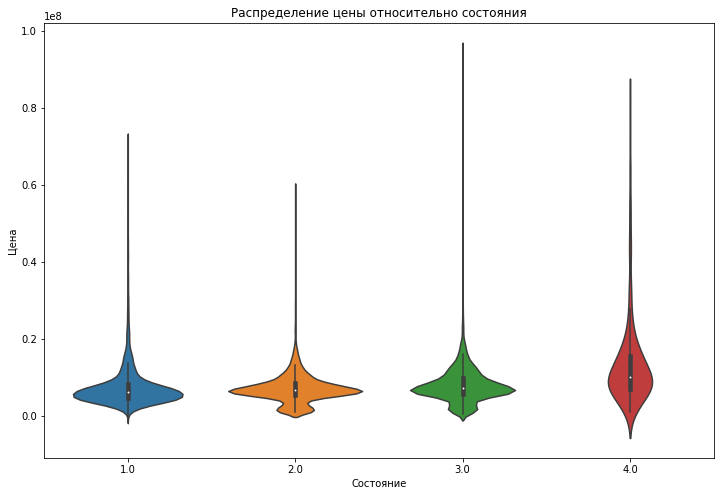

In [30]:
f, ax = plt.subplots(figsize=(12, 8))
ind = data[data['state'].isnull()].index
sns.violinplot(x="state", y="price_doc", data=data.drop(ind), inner="box")
ax.set(title='Распределение цены относительно состояния', xlabel='Состояние', ylabel='Цена')

[Text(0,0.5,'Цена'),
 Text(0.5,0,'Материал стен'),
 Text(0.5,1,'Распределение цены относительно материала стен')]

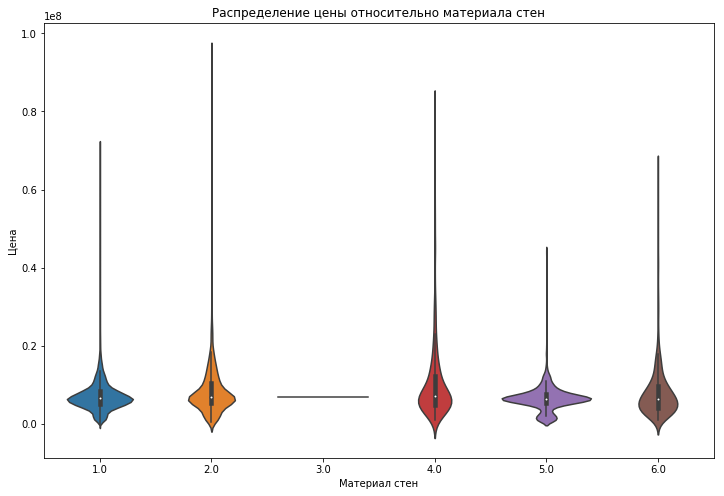

In [31]:
f, ax = plt.subplots(figsize=(12, 8))
ind = data[data['material'].isnull()].index
sns.violinplot(x="material", y="price_doc", data=data.drop(ind), inner="box")
ax.set(title='Распределение цены относительно материала стен', xlabel='Материал стен', ylabel='Цена')

Для материала 3 такой график из за того что присутствует только 1 объект.

In [32]:
data[data.material == 3]

id   timestamp  full_sq  life_sq  floor  max_floor  material  \
24715  24718  2014-11-13       61      NaN    8.0        1.0       3.0   

       build_year  num_room  kitch_sq  state   product_type  \
24715         NaN       2.0      10.0    NaN  OwnerOccupier   

                  sub_area       area_m  raion_popul  green_zone_part  \
24715  Poselenie Sosenskoe  66772450.69         9553         0.336177   

       indust_part  children_preschool  preschool_quota  \
24715     0.072158                 656              NaN   

       preschool_education_centers_raion  children_school  school_quota  \
24715                                  0              629           NaN   

       school_education_centers_raion  school_education_centers_top_20_raion  \
24715                               0                                      0   

       hospital_beds_raion  healthcare_centers_raion  university_top_20_raion  \
24715                  NaN                         0                        0   

       sport_objects_raion  additional_education_raion culture_objects_top_25  \
24715                    1                           0                     no   

       culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
24715                             0                       0             1   

      thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
24715                        no                 no                  no   

      radiation_raion railroad_terminal_raion big_market_raion  \
24715              no                      no              yes   

      nuclear_reactor_raion detention_facility_raion  full_all  male_f  \
24715                    no                       no     13890    6584   

       female_f  young_all  young_male  young_female  work_all  work_male  \
24715      7307       1370         709           661      6127       3237   

       work_female  ekder_all  ekder_male  ekder_female  0_6_all  0_6_male  \
24715         2890       2056         583          1473      656       340   

       0_6_female  7_14_all  7_14_male  7_14_female  0_17_all  0_17_male  \
24715         316       629        325          305      1542        801   

       0_17_female  16_29_all  16_29_male  16_29_female  0_13_all  0_13_male  \
24715          742       3134        1753          1381      1207        623   

       0_13_female  raion_build_count_with_material_info  build_count_block  \
24715          584                                   NaN                NaN   

       build_count_wood  build_count_frame  build_count_brick  \
24715               NaN                NaN                NaN   

       build_count_monolith  build_count_panel  build_count_foam  \
24715                   NaN                NaN               NaN   

       build_count_slag  build_count_mix  \
24715               NaN              NaN   

       raion_build_count_with_builddate_info  build_count_before_1920  \
24715                                    NaN                      NaN   

       build_count_1921-1945  build_count_1946-1970  build_count_1971-1995  \
24715                    NaN                    NaN                    NaN   

       build_count_after_1995  ID_metro  metro_min_avto  metro_km_avto  \
24715                     NaN       132       11.776009       5.729293   

       metro_min_walk  metro_km_walk  kindergarten_km  school_km   park_km  \
24715       68.751513       5.729293          3.77624   3.905484  3.992569   

       green_zone_km  industrial_km  water_treatment_km  cemetery_km  \
24715       0.139312       0.249754            6.903516      1.20941   

       incineration_km  railroad_station_walk_km  railroad_station_walk_min  \
24715         10.80727                 11.304316                 135.651791   

       ID_railroad_station_walk  railroad_station_avto_km  \
24715                      47.0                 12.978759   

       railroad_station_avto_min  ID_railroad_station_avto  \
247

Странные значения для высоких этажей - это лишь отсутсвие данных. Исходя их первых 20 этажей, где цена абсолютно не меняется,
можно сделать вывод что цена абсолютно не зависит от этажа, однако если смотреть на влияние признаков этаж будет 2. Странно, возможно это происходит как раз из за таких данных, где этаж высокий и цена тоже, однако их очень мало. 

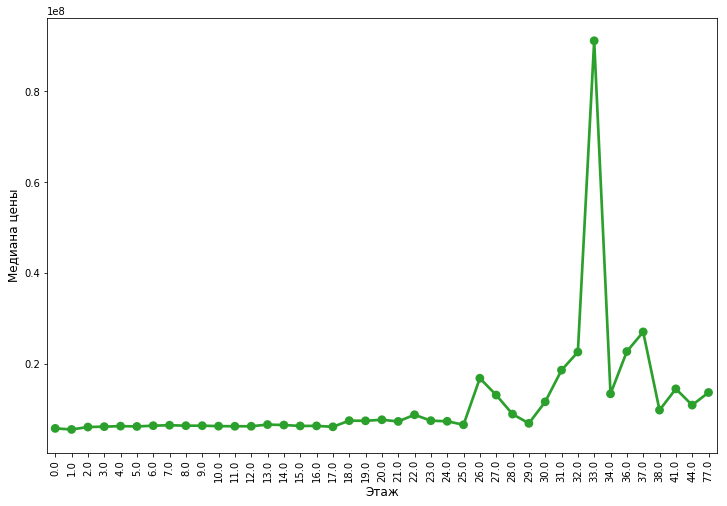

In [33]:
grouped_df = data.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.floor.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Медиана цены', fontsize=12)
plt.xlabel('Этаж', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
data.floor.value_counts()

3.0     2922
2.0     2780
5.0     2675
4.0     2530
1.0     1922
7.0     1909
6.0     1828
9.0     1802
8.0     1763
12.0    1302
10.0    1267
11.0    1222
14.0     976
13.0     883
16.0     780
17.0     763
15.0     711
18.0     220
19.0     203
22.0     171
20.0     167
21.0     134
23.0     117
25.0      99
24.0      94
32.0      13
26.0      13
27.0       7
28.0       6
30.0       6
31.0       5
0.0        5
29.0       3
34.0       2
36.0       2
37.0       2
44.0       2
41.0       1
38.0       1
77.0       1
33.0       1
Name: floor, dtype: int64

Ситуация с максимальным этажом примерно такая же.

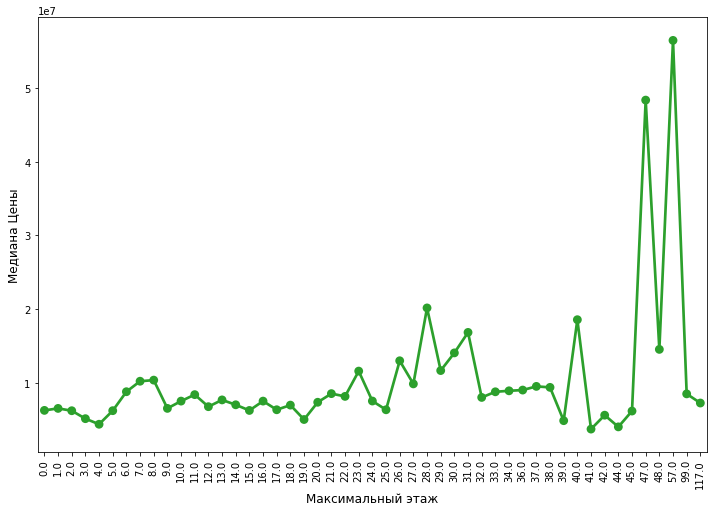

In [35]:
grouped_df = data.groupby('max_floor')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df.max_floor.values, grouped_df.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Медиана Цены', fontsize=12)
plt.xlabel('Максимальный этаж', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
data.max_floor.value_counts()

17.0     4353
9.0      2998
5.0      2247
12.0     2196
14.0     1353
16.0     1139
1.0       771
22.0      715
25.0      688
0.0       463
24.0      368
8.0       305
10.0      270
4.0       252
3.0       244
15.0      234
19.0      209
18.0      184
20.0      177
6.0       138
7.0       111
23.0       94
2.0        83
21.0       57
13.0       54
11.0       50
30.0       41
40.0       20
32.0       17
27.0       17
28.0       10
26.0       10
37.0        7
48.0        7
29.0        6
39.0        4
99.0        3
31.0        3
34.0        3
33.0        3
36.0        2
47.0        2
45.0        2
117.0       1
41.0        1
44.0        1
57.0        1
38.0        1
42.0        1
Name: max_floor, dtype: int64

После этого решил проверить, есть ли квартиры где максимальный этаж меньше этажа квартиры. нашлось примерно 1200 объектов.

Подумал что лучшее решение тут, выставить максимальный этаж равным текущему этажу.

In [37]:
a = data[data['max_floor'] < data['floor']]["id"]
for i in a:
    data.set_value(i-3,'max_floor',data[data["id"]==i]["floor"].values)

C:\Users\Geka\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


На этом закончил с параметрами квартиры. Решил дальше смотреть стальные признаки, посмотрел на демографические:
_____________________________________________________________________________________________________________________________

In [38]:
demo_vars = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_female', 'young_male',
             'work_all', 'work_male', 'work_female', 'price_doc']

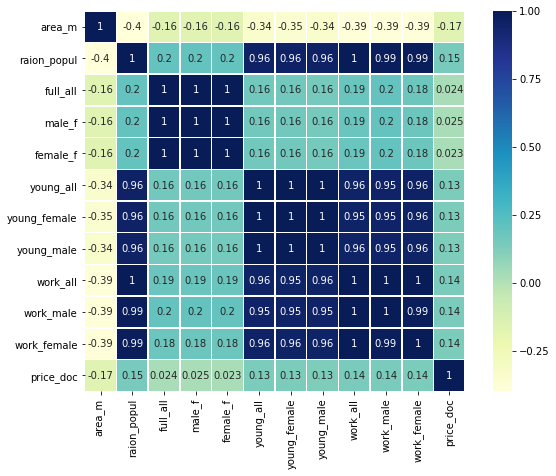

In [39]:
corrmat = data[demo_vars].corr()
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="YlGnBu")

С ценой коррелирует некоторые демографические признаки. Скорее всего от увеличения плотности населения и цена увеличивается.
Проверю это.

[Text(0.5,1,'Медиана цены транзакции отностильно плотности населения (люди на км^2)')]

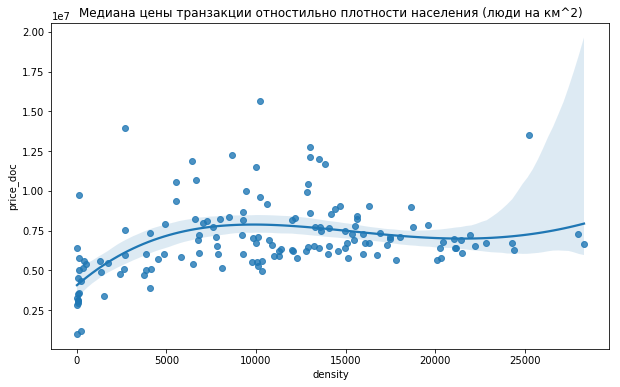

In [40]:
data["area_km"] = data["area_m"]/1000000 #перевел в километры
data['density'] = data['raion_popul'] / data['area_km'] #Подсчитал плотность для каждого района
f, ax = plt.subplots(figsize=(10, 6))
sa_price = data.groupby('sub_area')[['density', 'price_doc']].median() 
sns.regplot(x="density", y="price_doc", data=sa_price, scatter=True, truncate=True,order = 4)
ax.set(title='Медиана цены транзакции отностильно плотности населения (люди на км^2)')

На графике видно что средняя цена особо не зависит от плотности населения.

[Text(0.5,1,'District mean home price by share of working age population')]

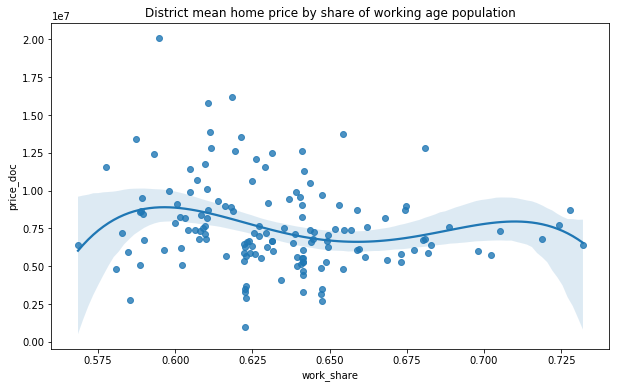

In [41]:
data["work_share"] = data["work_all"] / data["raion_popul"]
f, ax = plt.subplots(figsize=(10, 6))
sa_price = data.groupby("sub_area")[['work_share', 'price_doc']].mean()
sns.regplot(x="work_share",y = "price_doc",data=sa_price,scatter=True,truncate = True,order=4)
ax.set(title = "District mean home price by share of working age population")

Взял полиномиальное приближение 4 степени, но все равно нет никакой зависимости между количеством трудоспособного населения и ценой квартиры.

Дальше рассматривал школьные признаки:
    
_____________________________________________________________________________________________________________________________

In [42]:
school_chars = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat = data[school_chars].corr()

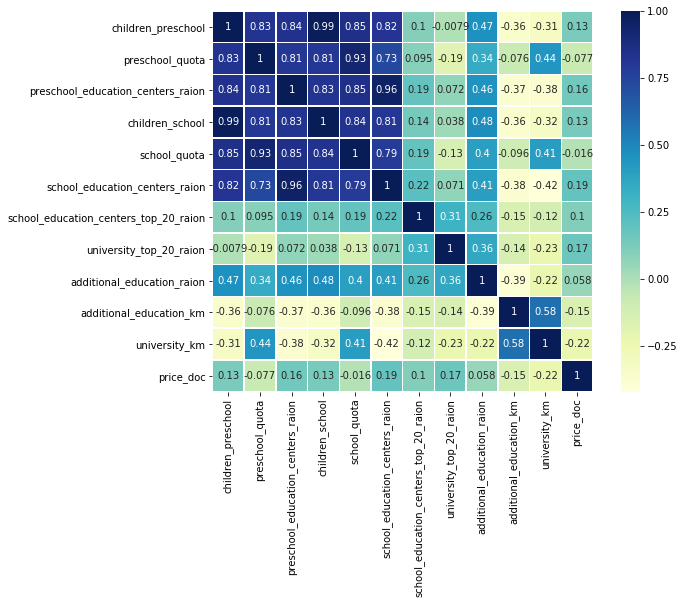

In [43]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="YlGnBu")

Особо ничего не коррелирует, смотреть не на что

Решил дальше смотреть стальные признаки, посмотрел на культурные признаки:
_____________________________________________________________________________________________________________________________

In [44]:
cult_chars = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'park_km', 'fitness_km', 
                'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km', 'shopping_centers_km', 'big_church_km',
                'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'price_doc']
corrmat = data[cult_chars].corr()

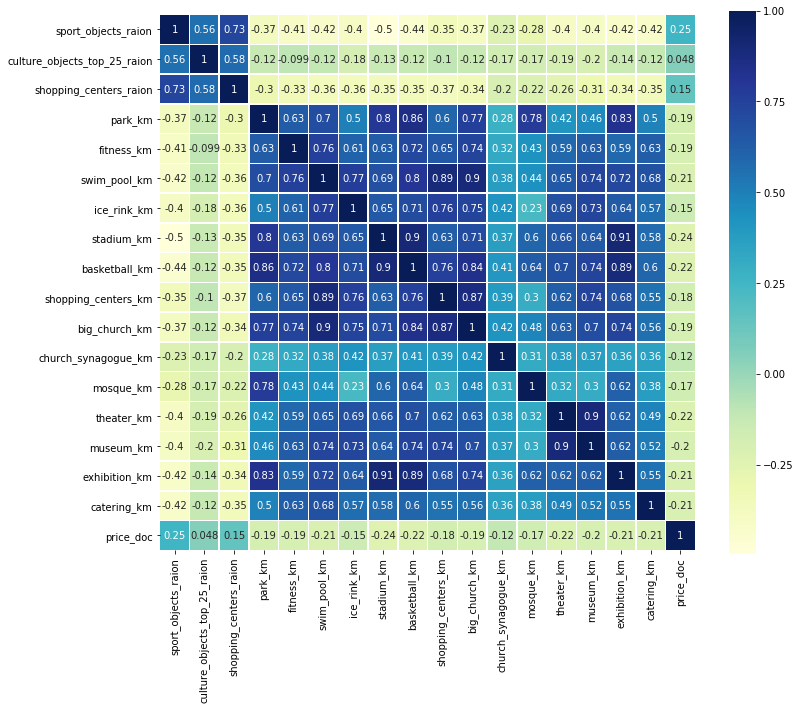

In [45]:
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="YlGnBu")

Наибольшая кореляция с спортивными объектами в районе, однако большинство культурных признаков отрицательно коррелируют с ценой. Это значит что чем больше культурных объектов в районе, тем дешевле квартиры в этом районе?

[Text(0.5,1,'Медиана цены отностительно количества спортивных объектов в районе')]

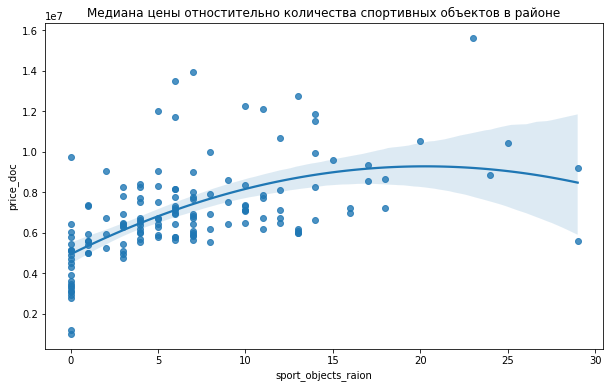

In [46]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = data.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x="sport_objects_raion", y="price_doc", data=so_price, scatter=True, truncate=True,order = 2)
ax.set(title='Медиана цены отностительно количества спортивных объектов в районе')

Кажется, что от увеличения количества спортивных объектов, цена действительно увеличивается.

[Text(0.5,1,'Медиана цены относительно количества объектов культурного наследия')]

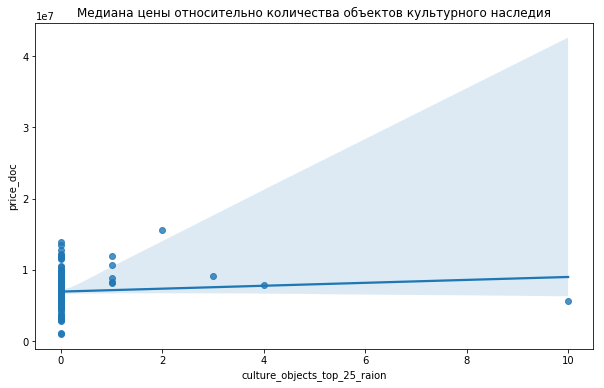

In [47]:
f, ax = plt.subplots(figsize=(10, 6))
co_price = data.groupby('sub_area')[['culture_objects_top_25_raion', 'price_doc']].median()
sns.regplot(x="culture_objects_top_25_raion", y="price_doc", data=co_price, scatter=True, truncate=True)
ax.set(title='Медиана цены относительно количества объектов культурного наследия')

Слишком мало данных чтобы что то сказать. Можно посмотреть просто на среднюю цену, если в районе есть хотя бы один/

In [48]:
data.groupby("culture_objects_top_25")["price_doc"].median()

culture_objects_top_25
no     6200000
yes    7488700
Name: price_doc, dtype: int64

Получается что если в районе есть один из крупных культурных объектов, цена в среднем увеличина на 1.2 миллиона рублей.

[Text(0.5,1,'Медиана цены относительно количества торговых центров')]

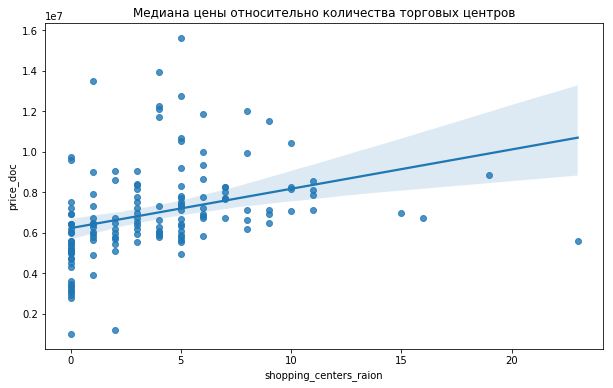

In [49]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = data.groupby('sub_area')[['shopping_centers_raion', 'price_doc']].median()
sns.regplot(x="shopping_centers_raion", y="price_doc", data=so_price, scatter=True, truncate=True,order = 1)
ax.set(title='Медиана цены относительно количества торговых центров')

Ситуация с торговыми центрами, примерно такая же как и со спортивными объектами, но менее выраженная зависимость.

[Text(0.5,1,'Медиана цены относительно расстояния до стадиона')]

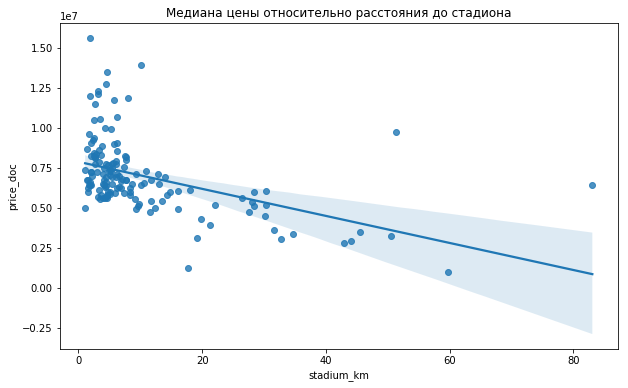

In [50]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = data.groupby('sub_area')[['stadium_km', 'price_doc']].median()
sns.regplot(x="stadium_km", y="price_doc", data=so_price, scatter=True, truncate=True,order = 1)
ax.set(title='Медиана цены относительно расстояния до стадиона')

Рассмотрел как пример признак отвечающий за расстояние до стадиона. Ничего интересного, вполне ожидаемая картина. Кваритры рядом со стадионами стоят как много так и мало. ПОнятно что с отдалением цена будет падать.

Решил дальше смотреть стальные признаки, посмотрел на инфраструктуру:
_____________________________________________________________________________________________________________________________

In [51]:
inf_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'metro_km_avto', 'metro_min_avto', 
                'metro_min_walk', 'metro_km_walk', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat = data[inf_features].corr()

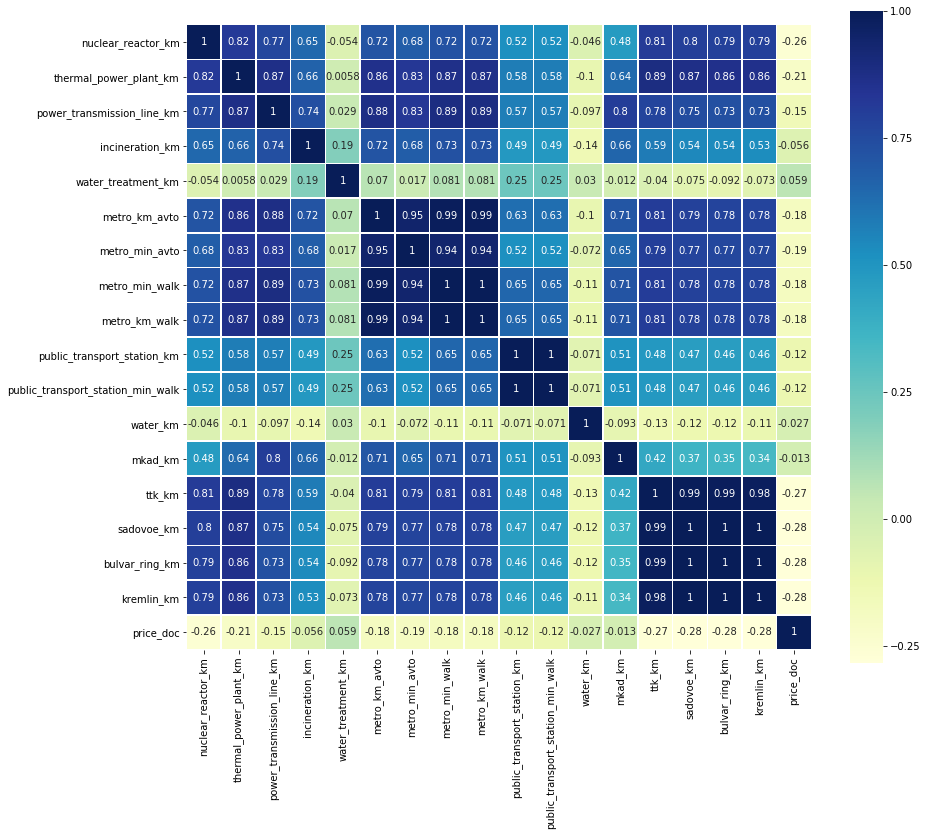

In [52]:
f, ax = plt.subplots(figsize=(14, 12))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="YlGnBu")

Единственное что тут мне показалось странным это параметр отвечающий за расстояние до МКАДа. Посмотрел поближе:

[Text(0.5,1,'Median Raion home price by sports objects in Raion')]

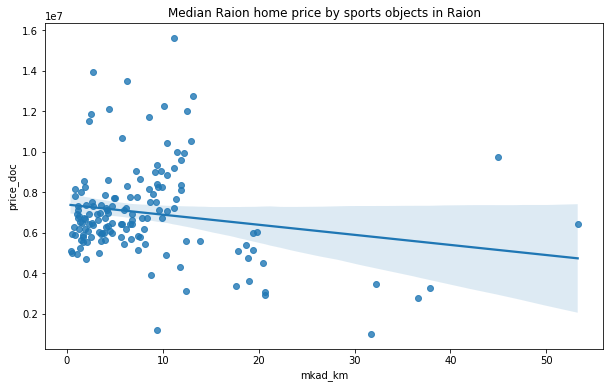

In [53]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = data.groupby('sub_area')[['mkad_km', 'price_doc']].median()
sns.regplot(x="mkad_km", y="price_doc", data=so_price, scatter=True, truncate=True,order = 1)
ax.set(title='Median Raion home price by sports objects in Raion')

In [54]:
data = data.drop(('timestamp'), axis = 1) 
data = data.drop(('id'), axis = 1) 
y  = data.price_doc
data = data.drop(('price_doc'), axis = 1) 
categorical_columns = []
numerical_columns = []
for c in data.columns:
    if data[c].dtype.name == 'object':
        categorical_columns.append(c)
    else:
        numerical_columns.append(c)   

In [55]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']

In [56]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [57]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]


In [58]:
for i in binary_columns:
    data.at[data[i] == data[i].unique()[0], i] = 0
    data.at[data[i] == data[i].unique()[1], i] = 1
    #data['product_type'].describe()

In [59]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])


In [60]:
data_numerical = data[numerical_columns]

In [61]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [62]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)


In [63]:
X = data
feature_names = X.columns


In [83]:
X

full_sq   life_sq     floor  max_floor  material  build_year  \
0     -0.472353 -0.348985 -0.690463   0.114682 -0.442600   -0.149214   
1     -0.861926 -0.824557 -0.879500   0.114682 -0.442600   -0.149214   
2     -0.472353 -0.230092 -1.068537   0.114682 -0.442600   -0.149214   
3      1.518802  1.018285  0.254721   0.114682 -0.442600   -0.149214   
4      0.999371  2.623340 -0.690463   0.114682 -0.442600   -0.149214   
5      0.566511  0.780499  1.199906   0.114682 -0.442600   -0.149214   
6     -1.251500 -1.121790  0.443758   0.114682 -0.442600   -0.149214   
7     -0.429067  0.661606 -0.501426   0.114682 -0.442600   -0.149214   
8     -0.515639 -0.348985 -0.501426   0.114682 -0.442600   -0.149214   
9     -0.775354 -0.705664  0.254721   0.114682 -0.442600   -0.149214   
10    -0.775354 -0.824557  0.821832   0.114682 -0.442600   -0.149214   
11    -0.688782 -0.824557  0.632795   0.114682 -0.442600   -0.149214   
12    -0.472353 -0.289539 -0.690463   0.114682 -0.442600   -0.149214   
13    -0.991784 -0.111199 -0.690463   0.114682 -0.442600   -0.149214   
14    -0.991784 -0.705664 -0.879500   0.114682 -0.442600   -0.149214   
15    -0.126065 -0.111199  1.388942   0.114682 -0.442600   -0.149214   
16    -0.299209 -0.111199 -0.690463   0.114682 -0.442600   -0.149214   
17    -0.515639 -0.289539 -1.068537   0.114682 -0.442600   -0.149214   
18     0.220223  0.007694  0.443758   0.114682 -0.442600   -0.149214   
19    -0.429067 -0.230092 -0.690463   0.114682 -0.442600   -0.149214   
20     0.869513  0.661606  0.443758   0.114682 -0.442600   -0.149214   
21    -0.645496  0.364373 -0.123352   0.114682 -0.442600   -0.149214   
22    -0.255923  0.067141 -0.312389   0.114682 -0.442600   -0.149214   
23    -0.948498 -0.884004 -0.879500   0.114682 -0.442600   -0.149214   
24    -0.861926 -0.824557  0.632795   0.114682 -0.442600   -0.149214   
25    -0.385781 -0.230092  0.254721   0.114682 -0.442600   -0.149214   
26    -0.818640 -0.765111 -0.690463   0.114682 -0.442600   -0.149214   
27    -0.688782 -0.765111 -0.312389   0.114682 -0.442600   -0.149214   
28     0.826227  0.304927  1.388942   0.114682 -0.442600   -0.149214   
29    -0.515639 -0.348985 -0.879500   0.114682 -0.442600   -0.149214   
...         ...       ...       ...        ...       ...         ...   
30440  1.951662  0.839945 -0.690463  -1.457217  0.336410   -4.457223   
30441  2.557666 -1.894594  3.468348   2.472531 -0.442600    2.036940   
30442 -0.602210  0.423820 -1.068537  -0.278293  1.894428    2.036940   
30443  1.085943 -0.170646  1.767016   0.704144 -0.442600   -0.149214   
30444  1.345658 -0.170646  2.334127   2.276043  1.894428    2.101239   
30445 -0.299209  0.839945  2.145090   2.276043 -0.442600    2.101239   
30446  1.215800  2.920573  0.065684  -1.064242  3.452446    2.165537   
30447  0.436653 -0.170646  1.388942   0.704144 -0.442600   -0.149214   
30448  0.869513 -0.170646  0.065684   0.704144 -0.442600   -0.149214   
30449 -0.299209  0.839945 -0.123352   2.276043 -0.442600    2.036940   
30450  0.479939 -0.170646 -0.501426  -1.653705 -0.442600   -0.149214   
30452 -0.688782 -0.824557 -0.123352   0.704144 -0.442600    1.458252   
30453 -0.385781 -1.894594 -0.312389   0.311169  3.452446    2.036940   
30454 -0.602210 -0.408432 -0.879500  -0.867755  0.336410   -0.727901   
30455  1.085943  2.742233 -0.879500  -2.046679 -0.442600   -0.149214   
30456 -0.082779 -0.170646  0.065684   0.114682 -0.442600    0.558071   
30457  0.176937  0.602159 -0.123352  -0.867755 -0.442600   -0.277811   
30458 -0.169351 -1.894594 -0.123352  -1.260730 -0.442600    2.036940   
30459 -0.126065 -0.170646 -0.690463   0.704144  1.894428   -0.149214   
30460  0.003793 -0.051752  0.065684   0.507657 -0.442600   -0.277811   
30461 -0.775354 -0.824557 -0.501426   0.507657 -0.442600   -0.213512   
30462 -0.299209 -0.170646  2.901237   2.276043  1.894428    2.101239   
30463  0.090365 -0.230092  1.010869   0.114682 -0.442600    1.136759   
30464  0.090365  1.077731  2.145090   1.097119 -

In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def predictionQuality(trueY, predY):
    print('RMSE: ' + str(np.sqrt(mean_squared_error(trueY, predY))), end='; ')
    print('MAE: ' + str(mean_absolute_error(trueY, predY)),end='; ')
    print('MAPE: ' + str(mean_absolute_percentage_error(trueY, predY)))


In [123]:
import sklearn.utils

In [124]:
from sklearn import linear_model
linearRegr = linear_model.LinearRegression()
linearRegr.fit(X, y)
predictedY = linearRegr.predict(X)
predictionQuality(y, predictedY)


RMSE: 3191786.1625330015; MAE: 1755560.461426245; MAPE: 49.716583390224315


In [65]:
#X = X.drop(('sub_area_Poselenie Klenovskoe'),axis = 1)
RS=1
np.random.seed(RS)
ROUNDS = 1500 
xgb_params = {
    'objective': 'reg:linear',
            'metric': 'rmse',
            'boosting': 'gbdt',
            'learning_rate': 0.01 , 
            'verbose': 0,
            'num_leaves': 2 ** 5,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': RS,
            'feature_fraction': 0.7,
            'feature_fraction_seed': RS,
            'max_bin': 100,
            'max_depth': 7,
            'num_rounds': ROUNDS,
}

dtrain = xgb.DMatrix(X, y, feature_names=X.columns)


[0]	train-rmse:8.54057e+06	test-rmse:8.54339e+06
[50]	train-rmse:5.57612e+06	test-rmse:5.72423e+06
[100]	train-rmse:3.86709e+06	test-rmse:4.18815e+06
[150]	train-rmse:2.91297e+06	test-rmse:3.42042e+06
[200]	train-rmse:2.40328e+06	test-rmse:3.06746e+06
[250]	train-rmse:2.12596e+06	test-rmse:2.90855e+06
[300]	train-rmse:1.97212e+06	test-rmse:2.82997e+06
[350]	train-rmse:1.88304e+06	test-rmse:2.7916e+06
[400]	train-rmse:1.8245e+06	test-rmse:2.77019e+06
[450]	train-rmse:1.77883e+06	test-rmse:2.75533e+06
[500]	train-rmse:1.73901e+06	test-rmse:2.74506e+06
[550]	train-rmse:1.70549e+06	test-rmse:2.73931e+06
[600]	train-rmse:1.67943e+06	test-rmse:2.73512e+06
[650]	train-rmse:1.65806e+06	test-rmse:2.73238e+06
[700]	train-rmse:1.63918e+06	test-rmse:2.73077e+06
[750]	train-rmse:1.62225e+06	test-rmse:2.72939e+06
[800]	train-rmse:1.6068e+06	test-rmse:2.7284e+06
[850]	train-rmse:1.59337e+06	test-rmse:2.72748e+06
[900]	train-rmse:1.57986e+06	test-rmse:2.72682e+06
[950]	train-rmse:1.56581e+06	test-rmse

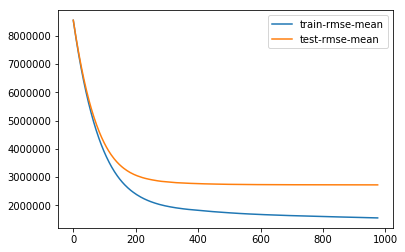

In [66]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [78]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1}
dtrain = xgb.DMatrix(X, y, feature_names=X.columns)

[0]	train-rmse:8.24452e+06	test-rmse:8.2483e+06
[50]	train-rmse:2.55049e+06	test-rmse:2.95697e+06
[100]	train-rmse:2.20688e+06	test-rmse:2.76849e+06
[150]	train-rmse:2.09551e+06	test-rmse:2.73252e+06
[200]	train-rmse:2.01452e+06	test-rmse:2.71732e+06
[250]	train-rmse:1.94336e+06	test-rmse:2.70566e+06
[300]	train-rmse:1.88621e+06	test-rmse:2.70228e+06
[350]	train-rmse:1.83102e+06	test-rmse:2.69895e+06


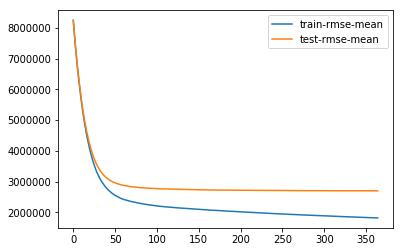

In [79]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [67]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) # random_state=None, shuffle=False
for train_index, test_index in kfold.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 5896  5897  5898 ... 29473 29474 29475] TEST: [   0    1    2 ... 5893 5894 5895]
TRAIN: [    0     1     2 ... 29473 29474 29475] TEST: [ 5896  5897  5898 ... 11788 11789 11790]
TRAIN: [    0     1     2 ... 29473 29474 29475] TEST: [11791 11792 11793 ... 17683 17684 17685]
TRAIN: [    0     1     2 ... 29473 29474 29475] TEST: [17686 17687 17688 ... 23578 23579 23580]
TRAIN: [    0     1     2 ... 23578 23579 23580] TEST: [23581 23582 23583 ... 29473 29474 29475]


In [116]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=kfold) #neg_mean_absolute_error
lassoCV.fit(X, y)
print('Best alpha: ' + str(lassoCV.alpha_))
print('Train data:')
predictionQuality(y, lassoCV.predict(X))

alphas = np.linspace(0,1000.0,num = 101)
lassoCV = LassoCV(alphas=alphas,cv=kfold) #neg_mean_absolute_error
#warnings.filterwarnings('ignore')
lassoCV.fit(X, y)
#warnings.filterwarnings('default')
print('Best alpha: ' + str(lassoCV.alpha_))
print('Train data:')
predictionQuality(y, lassoCV.predict(X))

C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best alpha: 2728.542370771939
Train data:
RMSE: 3239846.0382350525; R^2: 0.5485247646664105; MAE: 1771043.7490823197; MAPE: 50.35709450165127


C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


Best alpha: 290.0
Train data:
RMSE: 3207164.479162431; R^2: 0.5575872294767105; MAE: 1758847.4151816342; MAPE: 49.85074249669981


C:\Users\Geka\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [120]:
from sklearn.linear_model import ElasticNetCV
elasticNet = ElasticNetCV(cv=kfold)
elasticNet.fit(X, y)

print(elasticNet)
print('Train data:')
predictionQuality(y, elasticNet.predict(X))

ElasticNetCV(alphas=None, copy_X=True,
       cv=KFold(n_splits=5, random_state=None, shuffle=False), eps=0.001,
       fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
Train data:
RMSE: 4810767.554468189; MAE: 2919616.485534755; MAPE: 68.56979442353996


In [121]:
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(cv=kfold, scoring="neg_mean_squared_error") #neg_mean_absolute_error
ridgeCV.fit(X, y)
print('Best alpha: ' + str(ridgeCV.alpha_))
print('Train data:')
predictionQuality(y, ridgeCV.predict(X))

alphas = np.linspace(0.0,50.0,num = 51)
ridgeCV = RidgeCV(alphas=alphas, cv=kfold, scoring="neg_mean_squared_error") #neg_mean_absolute_error
ridgeCV.fit(X, y)
print('\nBest alpha: ' + str(ridgeCV.alpha_))
print('Train data:')
predictionQuality(y, ridgeCV.predict(X))


Best alpha: 0.1
Train data:
RMSE: 3195060.014060524; MAE: 1758347.5824071341; MAPE: 49.78375101366516

Best alpha: 42.0
Train data:
RMSE: 3213790.5554202963; MAE: 1757988.9582405123; MAPE: 49.949198865673786


In [118]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

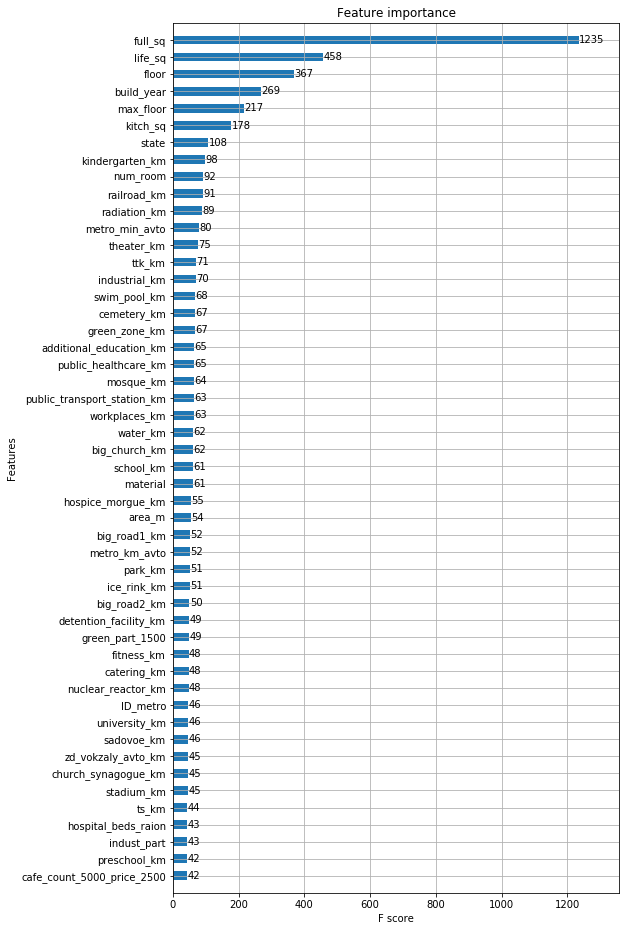

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

In [119]:
predictedY = model.predict(dtrain)
predictionQuality(y, predictedY)

RMSE: 1946475.4131539362; MAE: 1207042.9436702742; MAPE: 39.544740319252014


In [77]:
data_test = pd.read_csv("test.csv")
data_test = data_test.drop(('timestamp'), axis = 1) 
data_id = data_test.id
data_test = data_test.drop(('id'), axis = 1) 
data_test["area_km"] = data_test["area_m"]/1000000 #перевел в километры
data_test['density'] = data_test['raion_popul'] / data_test['area_km'] #Подсчитал плотность для каждого района
data_test["work_share"] = data_test["work_all"] / data_test["raion_popul"]


In [78]:
categorical_columns_test = []
numerical_columns_test = []
for c in data_test.columns:
    if data_test[c].dtype.name == 'object':
        categorical_columns_test.append(c)
    else:
        numerical_columns_test.append(c)  

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000000000CD7FB70>>
Traceback (most recent call last):
  File "C:\Users\Geka\Anaconda3\lib\site-packages\xgboost\core.py", line 368, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [79]:
categorical_columns_test = [c for c in data_test.columns if data_test[c].dtype.name == 'object']
numerical_columns_test   = [c for c in data_test.columns if data_test[c].dtype.name != 'object']

In [80]:
data_test = data_test.fillna(data_test.median(axis = 0), axis = 0)

In [81]:
data_describe_test = data_test.describe(include = [object])
binary_columns_test    = [c for c in categorical_columns_test if data_describe_test[c]['unique'] == 2]
nonbinary_columns_test = [c for c in categorical_columns_test if data_describe_test[c]['unique'] > 2]


In [82]:
for i in binary_columns_test:
    data_test.at[data_test[i] == data_test[i].unique()[0], i] = 0
    data_test.at[data_test[i] == data_test[i].unique()[1], i] = 1
    #data['product_type'].describe()

In [83]:
data_nonbinary_test = pd.get_dummies(data_test[nonbinary_columns_test])


In [84]:
data_numerical_test = data_test[numerical_columns_test]

In [85]:
data_numerical_test = (data_numerical_test - data_numerical_test.mean(axis = 0))/data_numerical_test.std(axis = 0)

In [89]:
data_test = pd.concat((data_numerical_test, data_nonbinary_test, data_test[binary_columns_test]), axis = 1)
data_test[data_test.product_type.isnull()==True] = 1

In [90]:
X_test = data_test
dtest = xgb.DMatrix(X_test, feature_names=X_test.columns)
y_pred = model.predict(dtest)
df_sub = pd.DataFrame({'id': data_id, 'price_doc': y_pred})
df_sub.to_csv('sub.csv', index=False)